# Cracking the code interview

## Recursion and DP

### 9.1 Children and ladder

In [70]:
# I think this solution will work only when step +1 is available
# It's wrong assumption! because if ladders_dp[i] will be 0 (no way). 
# The others also will be 0, because of ladders_dp[i+step] += ladders_dp[i]

def rising_dp(n):
    # Rising recursion
    ladders_dp = [0 for i in range(n)]
    ladders_dp[0] = 1
    steps = [+1, +2, +3]

    for i in range(0, n):
        for step in steps:
            if i+step < n:
                ladders_dp[i+step] += ladders_dp[i]

    print(ladders_dp[-1])

In [88]:
rising_dp(4)

4


In [89]:
def descending_dp(n):
    dp = [0 for i in range(n)]
    dp[0] = 1
    steps = [+1, +2, +3]
    
    def count_ways(ladder):
        if dp[ladder] == 0:
            ways_cnt = 0
            for step in steps:
                prev_ladder = ladder - step
                if prev_ladder >= 0:
                    dp[ladder] += count_ways(prev_ladder)
        return dp[ladder]
    
    return count_ways(n-1)

In [86]:
descending_dp(4)

4

###  9.2

In [143]:
def descending_dp(n):
    dp = [[0 for i in range(n)] for j in range(n)]
    dp[0][0] = 1
    
    steps = [(+1, 0), (0, +1)] # Down and right
    
    def count_ways(i, j):
        if dp[i][j] == 0:
            for step in steps:
                di, dj = step
                prev_i, prev_j = i-di, j-dj
                if prev_i >=0 and prev_j >= 0:
                    dp[i][j] += count_ways(prev_i, prev_j)
        return dp[i][j]
    
    return count_ways(n-1, n-1)

In [141]:
# First number below is a count of calls of count_ways function.
# It should be O(n**2) where n - side of a matrix
# I removed this counter. If you need reffer extended example below
descending_dp(100)

19801


22750883079422934966181954039568885395604168260154104734000

Seems fine. But now there are an obstacles somewhere

In [99]:
import random

In [114]:
def generate_new_field(n):
    field = [[0 for i in range(n)] for j in range(n)]
    for i in range(n**2):
        if random.choice([True, False]):
            field[(i // n)][i % n] = -1
    print("\n".join(str(row) for row in field))
    return field

In [116]:
field = generate_new_field(3)

[0, -1, 0]
[-1, -1, 0]
[-1, -1, -1]


In [127]:
def descending_dp(field, n):
    dp = [[0 for i in range(n)] for j in range(n)]
    if field[0][0] != -1:
        dp[0][0] = 1
    steps = [(+1, 0), (0, +1)]
    calls_count = 0 # For experiment only
    
    def count_ways(i, j):
        nonlocal calls_count
        calls_count += 1
        should_count = field[i][j] != -1 and dp[i][j] == 0
        if should_count:
            for step in steps:
                di, dj = step
                prev_i, prev_j = i-di, j-dj
                if prev_i >= 0 and prev_j >= 0:
                    dp[i][j] += count_ways(prev_i, prev_j)
        return dp[i][j]
    
    res = count_ways(n-1, n-1)
    print(calls_count)
    return res

In [135]:
field = generate_new_field(3)

[0, -1, 0]
[0, 0, -1]
[0, 0, 0]


In [136]:
descending_dp(field, 3)

9


2

Wow! Python 3.6 has new format feature!

In [144]:
f"printting field {field}"

'printting field [[0, -1, 0], [0, 0, -1], [0, 0, 0]]'

### 9.3 Magic index

In [155]:
ind = [0,1,2,3,4,5] # Visual sugar
seq = [5,5,5,5,5,5]

def find_magic_idx(seq):
    possible_idx = seq[0]
    steps_done = 0
    
    while possible_idx < len(seq):
        steps_done += 1
        if seq[possible_idx] == possible_idx:
            print(f"Checked {steps_done} elements of {len(seq)}")
            return possible_idx
        else:
            possible_idx = seq[possible_idx]
    
    print(f"Checked {steps_done} elements of {len(seq)}")
    return None

In [156]:
find_magic_idx(seq)

Checked 1 elements of 6


5

In [164]:
import random
seq = [random.randint(0, 1000) for i in range(1000)]
seq.sort()
find_magic_idx(seq)

Checked 5 elements of 1000


22


```
Works nice! We can find first magic num in 
sequence very fast in best cases
In worst case, when 
i 0 1 2 3 4 5 6 7
v 1 2 3 4 5 6 7 8
then we will get O(n)
```


```
If all values are the same, then 
if value in sequence's indices range:
    O(1) and we will get our value
else
    O(1) and we will not get our value 
```

### 9.4 All subsets of a set

Hacky solution with time complexity is $O(2^n log_2(n))$ where n - cardinality of set  
Seems like $O(2^n * n)$ for memory

In [13]:
# check the biggest number for bin_len binary digits
def max_num(bin_len):
    return 2**bin_len - 1

def get_bit(num, i):
    return int((num & (1 << i)) != 0)

def all_subsets(s: set):
    n = len(s)
    subsets = []
    elements = list(s)
    
    for splitting in range(max_num(n) + 1):
        subset = []
        for i in range(n):
            if get_bit(splitting, i):
                subset.append(elements[i])
        subsets.append(subset)
    return subsets

In [14]:
s = set([1,2,3])
all_subsets(s)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

Better solution ?  
Solution below works with elements directly and so we loosing $log_2(n)$ from time complexity bound  
Run time - $O(2^n)$ and can't be less then size of the output  
Memory usage - $O(2^n * n)$

Seems like there is no overlapping cases, because  
recursion calls forms descending tree

I think lists are not fast when we need often to allocate some memory  
Good idea will be:  
1) to allocate memory for all sequencies  
2) say idxes for subset in allcoated memory for all recursion calls

In [40]:
# What about recursion?
# And work with objects not with indices
def gen_subsets(s: set):
    def gen_subset(subsets, subset, elements, cur_idx):
        if cur_idx == len(elements):
            subsets.append(subset)
            return
        
        # Copy to make new set branching on current element
        subset_without_cur_el = subset.copy()
        subset_with_cur_el = subset + [elements[cur_idx]]
        
        next_idx = cur_idx + 1
        gen_subset(subsets, subset_with_cur_el, elements, next_idx)
        gen_subset(subsets, subset_without_cur_el, elements, next_idx)
        
    subsets = []
    subset = []
    elements = list(s)
    cur_idx = 0
    gen_subset(subsets, subset, elements, cur_idx)
    return subsets

In [41]:
s

{1, 2, 3}

In [42]:
gen_subsets(s)

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]

Maybe one more interesting solution?  
```
n = 0  
{}  
n = 1
{}, {a_1}
n = 2
{}, {a_1}, {a_2}, {a_1, a_2}
```

So
$P_3 = P_2 + (P_2 + a_3)$ and so on

In [14]:
def gen_subsets(s: set):
    # Iterative will work
    elements = list(s)
    sets = [{}]
    for el in elements:
        sets_with_el = []
        for set_without_el in sets:
            set_with_el = set(set_without_el)
            set_with_el.add(el)
            sets_with_el.append(set_with_el)
        sets.extend(sets_with_el)
    return sets

In [15]:
gen_subsets({1,2,3})

[{}, {1}, {2}, {1, 2}, {3}, {1, 3}, {2, 3}, {1, 2, 3}]

### 9.5 All permutations of string

--------

First algo below is very bad

|Aspect|Complexity|Commentaries|
|------|----------|------------|
|Time  |$O(n!\,n)$|            |
|Memory|$O(n!\,n)$|But also there are a lot of copies|

I remember that more elegant algorhytms exists

In [57]:
# It's a bad solution
# Whoa. String can contain equal characters!
def permitations(s: str):
    def permutation(perms, cur_perm, chars_lasts):
        if len(chars_lasts) == 0:
            perms.append(cur_perm)
            return
        
        for i, char in enumerate(chars_lasts):
            new_chars_lasts = chars_lasts.copy()
            del new_chars_lasts[i]
            permutation(perms, cur_perm.copy() + [char], new_chars_lasts)

    perms = []
    cur_perm = []
    chars_lasts = list(s)
    permutation(perms, cur_perm, chars_lasts)
    return perms

In [62]:
len(permitations("abba"))

24

I often forget permutation algorhytms, because they have a hucky idea

*TODO read 2 of them in Levitin's book*

Try iterative way for these algos 

And think a bit more about how much memory they use.  
Because at every recursion level new array creates for each branch,   
but old array may not be deleted for some time  

### 9.6 Correct brackets sequencies generator

In [78]:
def brackets_sequencies(n):
    sequencies = []
    def bracket_sequence(seq, opened):
        if len(seq) == 2*n:
            assert(opened == 0)
            sequencies.append(seq)
        elif opened == 0:
            bracket_sequence(seq + '(', opened+1)
        elif opened > 0:
            lasts = 2*n - len(seq)
            if opened < lasts: # any of ( or ) is possible
                bracket_sequence(seq + '(', opened + 1)
                bracket_sequence(seq + ')', opened - 1)
            else: # only ) is possible
                bracket_sequence(seq + ')', opened - 1)
    
    bracket_sequence('(', 1)
    return sequencies

It works!  
cnt = count of all correct seuqencies (**todo**: remember how calculate it)  
Seems like time $O(cnt)$ and mem $O(cnt * n)$  

In [88]:
brackets_sequencies(4)

['(((())))',
 '((()()))',
 '((())())',
 '((()))()',
 '(()(()))',
 '(()()())',
 '(()())()',
 '(())(())',
 '(())()()',
 '()((()))',
 '()(()())',
 '()(())()',
 '()()(())',
 '()()()()']

### Work on bugs

![Johnson-Throtter](https://cdn.pbrd.co/images/GKhxZO2.png)

In [61]:
def DjonsonTrotter(n):
    # < < < < < < ... <
    marks = [-1 for i in range(n)]
    perm = list(range(n))
    
    # Don't know how but it should be O(1)
    # TODO this optimization
    def find_max_mobile_idx():
        max_idx = None
        for idx, el in enumerate(perm):
            near_idx = idx+marks[idx]
            if near_idx in range(0, n):
                is_mobile = perm[idx] > perm[near_idx]
                if is_mobile:
                    if max_idx is None:
                        max_idx = idx
                    elif perm[idx] > perm[max_idx]:
                        max_idx = idx
        return max_idx
    
    def change_direction(mobile_idx):
        mobile_el = perm[mobile_idx]
        for idx, el in enumerate(perm):
            if el < mobile_el:
                marks[idx] = -marks[idx] # invert mark
    
    while True:
        yield perm
        
        m_idx = find_max_mobile_idx()
        if m_idx is None:
            break
               
        near_idx = m_idx + marks[m_idx]
        perm[near_idx], perm[m_idx] = perm[m_idx], perm[near_idx]
        marks[near_idx], marks[m_idx] = marks[m_idx], marks[near_idx]
        
        m_idx = near_idx
        change_direction(m_idx)

In [62]:
for perm in DjonsonTrotter(3):
    print(perm)

[0, 1, 2]
[0, 2, 1]
[2, 0, 1]
[2, 1, 0]


In [34]:
def heap_permute(n, A):
    # print(f"{A[:n]} -> {A}")
    if n == 1:
        pass
        print(A)
    else:
        for i in range(n):
            heap_permute(n-1, A)
            if n % 2 != 0:
                A[0], A[n-1] = A[n-1], A[0]
            else:
                A[i], A[n-1] = A[n-1], A[i]

In [35]:
seq = [1,2,3,4]
heap_permute(len(seq), seq)

[1, 2, 3, 4]
[2, 1, 3, 4]
[3, 1, 2, 4]
[1, 3, 2, 4]
[2, 3, 1, 4]
[3, 2, 1, 4]
[4, 2, 3, 1]
[2, 4, 3, 1]
[3, 4, 2, 1]
[4, 3, 2, 1]
[2, 3, 4, 1]
[3, 2, 4, 1]
[4, 1, 3, 2]
[1, 4, 3, 2]
[3, 4, 1, 2]
[4, 3, 1, 2]
[1, 3, 4, 2]
[3, 1, 4, 2]
[4, 1, 2, 3]
[1, 4, 2, 3]
[2, 4, 1, 3]
[4, 2, 1, 3]
[1, 2, 4, 3]
[2, 1, 4, 3]


In [73]:
# Time complexity: O(n * 2^n)
# Memory complexity: O(n) cause this is generator (generate and forget)
# If it wouldn't generator it could be O(2^n*n) lower than example before
# Because it case above memory was allocated in a calls tree
# So not only at last lever where it's about n*2^n (as many permutations), but at every level before (2^n-1 more)
def subsets(s: set):
    def subset_by_split(elemments, split):
        subset = []
        for i, is_in in enumerate(split):
            if is_in == 1:
                subset.append(elements[i])
        return subset
    
    elements = list(s)
    n = len(elements)
    split = [0 for i in range(n)]
    
    while True:
        yield subset_by_split(elements, split)
        # We can count in any of these 2 directions from 0 or from n
        try:
            first_zero_idx = split.index(0)
        except ValueError:
            break # No zeros lasts
        
        split[first_zero_idx] = 1
        for i in range(0, first_zero_idx):
            split[i] = 0

In [74]:
for subset in subsets(set('alabama')):
    print(subset)

[]
['m']
['b']
['m', 'b']
['l']
['m', 'l']
['b', 'l']
['m', 'b', 'l']
['a']
['m', 'a']
['b', 'a']
['m', 'b', 'a']
['l', 'a']
['m', 'l', 'a']
['b', 'l', 'a']
['m', 'b', 'l', 'a']


### 9.3 Paint Pouring

In [96]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [109]:
# Generate image with splits
def get_splitted_image(side_size, splits_count):
    image = np.zeros(shape=[n, n])
    for split in range(splits_count):
        split_color = random.randint(1, 5)
        split_idx = random.randint(0, n-1)
        horizontally = random.choice([True, False])
        if horizontally:
            image[split_idx] = split_color
        else:
            image[:, split_idx] = split_color
    return image

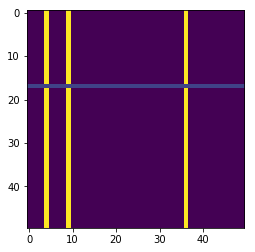

In [110]:
image = get_splitted_image(50, 5)
plt.imshow(image)
plt.show()

Fill all of outer space which is in other color  
Peek color of a pixel and paint all pixels of this color in given color using recursion

In [112]:
# helper class of point in matrix
class Point:
    def __init__(self, i, j):
        self.i = i
        self.j = j
    
    def neighbors(self, n):
        'n-1 is an upper limit of available space'
        points = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                new_i = self.i - di
                new_j = self.j - dj
                
                if 0 < new_i < n and 0 < new_j < n:
                    points.append(Point(new_i, new_j))
        return points   

In [115]:
# naive implementation
# for each point some neigbor points are checked more than one time!
def fill(image, point, color):
    def fill_point(point, old_color, color):
        'old_color - initial color of start pixel'
        if image[point.i][point.j] == old_color:
            image[point.i][point.j] = color
            for near_point in point.neighbors(len(image)):
                fill_point(near_point, old_color, color)
    
    old_color = image[point.i, point.j]
    fill_point(point, old_color, color)

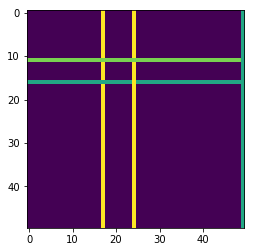

In [116]:
# before
image = get_splitted_image(50, 5)
plt.imshow(image)
plt.show()

In [117]:
fill(image, Point(11, 10), 3)

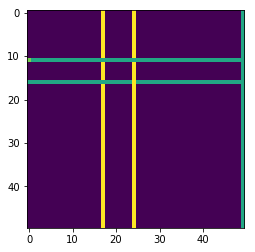

In [118]:
# after
plt.imshow(image)
plt.show()

In [121]:
fill(image, Point(30, 30), 1)

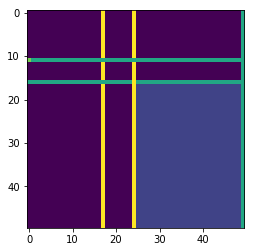

In [123]:
# after
plt.imshow(image)
plt.show()

### 9.8 Money

mem: $O(2^{n+1} - 1)$  
time: $O(2^{n+1} + 2^nlog_2n) = O(2^nlog_2n)$  
where second term is to add each num of last level of call tree to a set (which is probably a binary tree of search)

In [3]:
# Don't know how to use dp here
# because we don't have relations between different dp[i] and dp[j]
# So just a rising recursion
# 

def repr_count(n):
    coins = [1, 5, 10, 15]
    coins_for_n = set()
    
    def take_coin(cur_summ, coins_count):
        for coin in coins:
            new_summ = cur_summ + coin
            new_count = coins_count + 1
            if new_summ == n:
                coins_for_n.add(new_count)    
            elif new_summ < n:
                take_coin(new_summ, new_count)
            elif new_summ > n:
                return
    
    take_coin(0, 0)
    return len(coins_for_n)

In [6]:
repr_count(10)

4

In [17]:
# Solution above will fail
# Here is the test case (2 different sets of 3 coins with equal summ)
# 25 25 5
# 25 15 15
coins = [1, 5, 10, 25]
new_denom = dict(zip(coins[1:], coins[:-1]))

def make_change(n, denom):
    if denom == 1:
        return 1
    next_denom = new_denom[denom]
    
    ways = 0
    for denoms_cost in range(0, n+1, denom):
        ways += make_change(n-denoms_cost, next_denom)
    
    return ways

In [18]:
make_change(10, coins[-1])

4

In [9]:
new_denom

{5: 1, 10: 5, 25: 10}

### 9.9 queens placement

mem: $complexity = n + n!$ (due to recursion stack length) $O(n!)$  
time: $O(n!\, n^2$(due to position check)$)$

In [69]:
# До сих пор не понимаю строк 8 и 10
# todo буду коцать его и разберу в конце концов
def heap_permute(n, A):
    if n == 1:
        yield A
    else:
        for i in range(n):
            yield from heap_permute(n-1, A)
            if n % 2 != 0:
                A[0], A[n-1] = A[n-1], A[0]
            else:
                A[i], A[n-1] = A[n-1], A[i]

In [62]:
import numpy as np

def check_placement(queens):
    for v, h in enumerate(queens):
        for o_v, o_h in enumerate(queens):
            if v != o_v:
                dv, dh = o_v - v, o_h - h
                beaten_on_diagonal = abs(dv) == abs(dh)
                if beaten_on_diagonal:
                    return False
    return True

# Nice idea is to draw lines of queens danger
def print_placement(queens):
    n = len(queens)
    for h in range(n):
        for v in range(n):
            if v == queens[h]:
                print('Q', end='')
            else:
                print(' ', end='')
        print(' ')
    print()
    

def queens_safe_placements(n):
    # Index is a vertical, value is a horizontal
    queens = list(range(n))
    placements_count = 0
    
    # placement is a safe on verticals and horizontals
    # but not always on diagonals
    for queens_placement in heap_permute(n, queens):
        good_placement = check_placement(queens_placement)
        if good_placement:
            print_placement(queens) # or yield
            placements_count += 1
            
    return placements_count

In [41]:
def test_placement(queens):
    print("Is placement {} is good? {}".format(queens, 
                                               check_placement(queens)))
    print_placement(queens)

In [63]:
bad_placement = [0,1,2,3]
good_placement = [2,0,3,1]

test_placement(bad_placement)
test_placement(good_placement)

Is placement [0, 1, 2, 3] is good? False
Q    
 Q   
  Q  
   Q 

Is placement [2, 0, 3, 1] is good? True
  Q  
Q    
   Q 
 Q   



In [68]:
queens_safe_placements(4)

  Q  
Q    
   Q 
 Q   

 Q   
   Q 
Q    
  Q  



2

### 9.10 Stacks of boxes

Я заметил несколько вариантов решения в зависимости от трактовки условия  
Самое привлекательное - когда ящики нельзя поворачивать и можно ставить начиная сверху

In [28]:
class Box:
    'h is the third dimension'
    def __init__(self, w, d, h):
        self.w = w
        self.d = d
        self.h = h
    
    def __repr__(self):
        return f'[width: {self.w}, depth: {self.d}, height: {self.h}]'

In [42]:
def make_stack(boxes):
    boxes.sort(key=lambda b: b.w) # O(nlogn)
    boxes.sort(key=lambda b: b.d)
    boxes_stack = [boxes[0]]
    prev_box = boxes[0]
    for box in boxes[1:]: # Build from top (shoose smallest)
        if prev_box < box:
            boxes_stack.insert(0, box)
            prev_box = box
        
    return list(reversed(boxes_stack))

In [43]:
boxes = [Box(1,10,2), Box(2,3, 30), Box(30, 1, 10), Box(1, 1, 100)]

make_stack(boxes)

[[width: 1, depth: 1, height: 100], [width: 2, depth: 3, height: 30]]

Вышло не так красиво как предпологалось. Была заминка в сортировке.  
Так решение около n log n.  

### 9.11 Logic operations

In [60]:
ops = [
    #x  y  ^  &  |
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 1, 1]
]

op_col = {'^': 2, '&': 3, '|': 4}

def f(expr, res):
    global ops, op_col
    # 1 operand (0 or 1)
    if len(expr) == 1:
        if int(expr) == res:
            return 1
        else:
            return 0
    
    ways_cnt = 0
    for i in range(1, len(expr), 2):
        op = expr[i]
        lexpr = expr[:i]
        rexpr = expr[i+1:] 
         
        for i in range(4):
            cur_res = ops[i][op_col[op]]
            if cur_res == res:
                lres = ops[i][0]
                rres = ops[i][1]
                ways_cnt += f(lexpr, lres) * f(rexpr, rres)

    return ways_cnt

In [54]:
f('1^0|0|1', 0)

2

Playing with memorization

In [38]:
def fn(*args):
    print(args)
    print(type(args))

In [39]:
fn('a', 5)

('a', 5)
<class 'tuple'>


In [68]:
class Memoize:
    def __init__(self, fn):
        self.fn = fn
        self.memo = {}
    def __call__(self, *args):
        if args not in self.memo:
            self.memo[args] = self.fn(*args)
        return self.memo[args]

In [66]:
def memorize(func):
    expr_hash = {}
    
    def helper(expr, res):
        key = f'{expr}={res}'
        if key not in expr_hash:
            expr_hash[key] = func(expr, res)
        return expr_hash[key]
    return helper

In [47]:
df_f = memorize(f) # will not work because only last iteration will be cached

In [62]:
f = memorize(f) # T

In [65]:
f('1^0|1', 0)

I was called!
I was called!
I was called!
I was called!
I was called!
I was called!
I was called!


1